
# titan data set : NaiveBayes

In [2]:
import pandas as pd

In [3]:
df = pd.read_excel("D:/project/titan/Titanic.xlsx")

In [4]:
df.head()

,PassengerId,Name,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,"Braund, Mr. Owen Harris",3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,"Heikkinen, Miss. Laina",3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,female,35.0,1,0,113803,53.1000,C123,S,1
4,5,"Allen, Mr. William Henry",3,male,35.0,0,0,373450,8.0500,NaN,S,0


In [5]:
df.drop(["PassengerId","Name","SibSp","Ticket","Fare","Cabin","Parch"],axis=1,inplace=True)

In [6]:
df.head()

,Pclass,Sex,Age,Embarked,Survived
0,3,male,22.0,S,0
1,1,female,38.0,C,1
2,3,female,26.0,S,1
3,1,female,35.0,S,1
4,3,male,35.0,S,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Sex       891 non-null    object 
 2   Age       714 non-null    float64
 3   Embarked  889 non-null    object 
 4   Survived  891 non-null    int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 34.9+ KB


In [8]:
df.dropna(subset=["Embarked"],inplace=True)

In [9]:
x = df["Age"].mean()

In [10]:
df["Age"] = df["Age"].fillna(round(x))

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    889 non-null    int64  
 1   Sex       889 non-null    object 
 2   Age       889 non-null    float64
 3   Embarked  889 non-null    object 
 4   Survived  889 non-null    int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 41.7+ KB


In [12]:
X = df.drop(["Survived"],axis=1)

In [13]:
y = df.Survived

In [14]:
from sklearn.preprocessing import LabelEncoder
encode = LabelEncoder()
X["Sex"] = encode.fit_transform(X["Sex"])
X["Embarked"] = encode.fit_transform(X["Embarked"])
X.head()

,Pclass,Sex,Age,Embarked
0,3,1,22.0,2
1,1,0,38.0,0
2,3,0,26.0,2
3,1,0,35.0,2
4,3,1,35.0,2


In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [16]:
X_train.shape

(711, 4)

In [17]:
y_train.shape

(711,)

In [18]:
from sklearn.naive_bayes import BernoulliNB
model = BernoulliNB()
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.797752808988764

In [19]:
y_pred = model.predict(X_test)
y_pred[:5]

array([0, 1, 1, 0, 1], dtype=int64)

In [20]:
y_test[:5]

281    0
435    1
39     1
418    0
585    1
Name: Survived, dtype: int64

<Axes: >

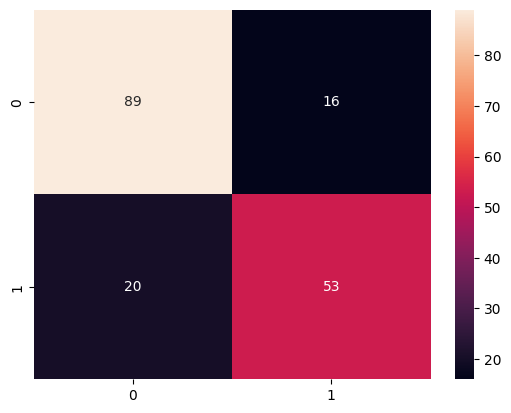

In [21]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_pred,y_test)
import seaborn as sns
sns.heatmap(cm,annot=True)

In [22]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.7808988764044944

In [23]:
y_pred = model.predict(X_test)
y_pred[:5]

array([0, 1, 1, 0, 1], dtype=int64)

In [24]:
y_test[:5]

281    0
435    1
39     1
418    0
585    1
Name: Survived, dtype: int64

<Axes: >

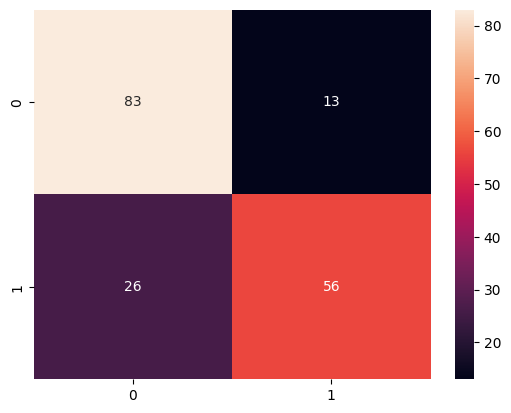

In [25]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_pred,y_test)
import seaborn as sns
sns.heatmap(cm,annot=True)

In [26]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.6910112359550562

In [27]:
y_pred = model.predict(X_test)
y_pred[:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [28]:
y_test[:5]

281    0
435    1
39     1
418    0
585    1
Name: Survived, dtype: int64

<Axes: >

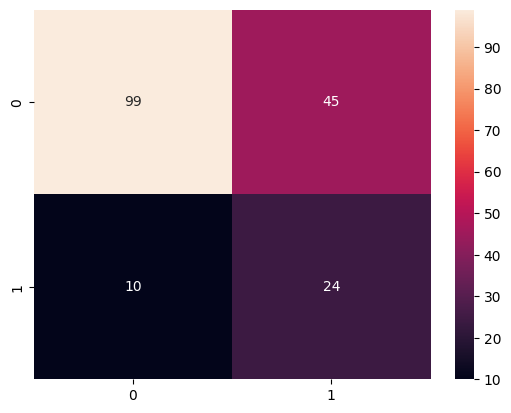

In [32]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_pred,y_test)
import seaborn as sns
sns.heatmap(cm,annot=True)

In [33]:
y_pred = model.predict(X_test)
y_pred[:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [34]:
y_test[:5]

281    0
435    1
39     1
418    0
585    1
Name: Survived, dtype: int64